# 지도학습 회귀 미리보기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 농어 무게 예측
- KNN 이웃 회귀 모델을 통해 길이값으로 무게를 예측

##### 데이터 로드 및 정지 ➡️ 전처리 ➡️ 시각화(EDA)

In [3]:
# 데이터 준비
# -입력 데이터: 길이
# - 정답 데이터: 무게

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

perch_length.shape, perch_weight.shape

((56,), (56,))

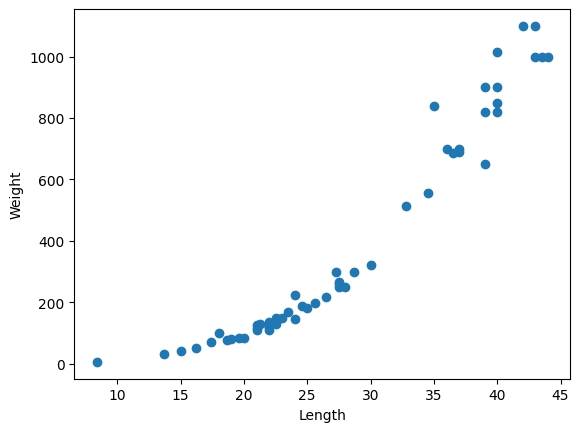

In [7]:
# Data Visualization
plt.scatter(perch_length, perch_weight)
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_label, test_label = \
train_test_split(perch_length, perch_weight, random_state=42)

train_input.shape, test_input.shape, train_label.shape, test_label.shape

((42,), (14,), (42,), (14,))

In [9]:
# 배치 차원 추가 (sklearn 라이브러리가 2차원 배열을 기대함)
train_input = train_input.reshape(-1,1) # 알아서 차원 확장
test_input = test_input.reshape(-1,1)

train_input.shape, test_input.shape

((42, 1), (14, 1))

### 훈련

In [10]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_label)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### 평가
- 결정계수(Coefficient of determination)
$$
R^2 = 1- \frac{(실제 - 예측^2)의 합}{(실제 - 평균)^2의 합}
= 1 - \frac{SSR}{SST} = 1- \frac{\sum_{i=1}(y_{i}-\hat{y})^2 }{\sum_{i=1}(y_{i}-\bar{y})^2}
$$

In [ ]:
knr.score(test_input, test_label) # R2 score로 평가

0.992809406101064

### 예측

In [ ]:
knr.predict([[30]]) # 길이가 30이면, 예측값은?

array([311.4])

In [13]:
distance, index = knr.kneighbors([[30]])
distance, index

(array([[1.3, 2.5, 2.5, 2.8, 3.5]]), array([[28, 13, 18, 20, 21]]))

In [ ]:
# 예측 결과 == 최근접 이웃 K개(5개) 무게 값의 평균치
train_label[index].mean() 

np.float64(311.4)

### 최근접 이웃 모델의 한계
1. 용량이 큰 데이터를 메모리에 로드할 때의 문제
2. 메모리에 로드 된 데이터포인트만 대상으로 예측하므로 한계점에서 취약

In [18]:
knr.predict([[50], [100]]) # 가장 주변 놈의 평균을 때리니까 길이 차이가 두 배 차이가 나는데도 예측 무게가 같음

array([1010., 1010.])

## 선형 회귀 모델 (Linear Regression)
- 속성에 따라 회귀 계수와 절편을 학습하고, 이를 통해 예측

#### 컬럼이 하나인 경우

$y = w•x  + b$
1. 회귀계수 w (=기울기, 가중치, weight, coefficient)
2. 절편 b (=편향, bias, intercept)

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_label)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
print(lr.coef_)
print(lr.intercept_)

[39.01714496]
-709.0186449535474


In [21]:
# 예측값 직접 계산
w = lr.coef_
b = lr.intercept_

x = np.array([50,100])
y = w*x + b
print(y)

[1241.83860323 3192.69585141]


In [22]:
# 모델을 통한 예측
lr.predict([[50],[100]])

array([1241.83860323, 3192.69585141])

In [23]:
# 평가
lr.score(test_input, test_label)

0.824750312331356

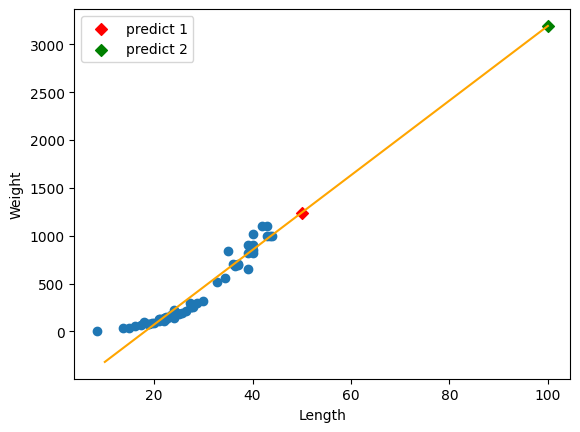

In [33]:
# 시각화
plt.scatter(perch_length, perch_weight)
plt.scatter(50, w*50+b, color='red', marker='D', label="predict 1")
plt.scatter(100, w*100+b, color='green', marker='D', label='predict 2')
plt.xlabel("Length")
plt.ylabel("Weight")
plt.legend()
plt.plot([10,100],[w*10+b, w*100+b], color='orange')
plt.show()